<a href="https://colab.research.google.com/github/jdjones91/jdjones91/blob/main/Neural_Network_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#James Jones
###10-26-2022

In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Sci-kit learn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

We are building a neural network to predict housing prices using a data set from kaggle (training data only).
  - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=test.csv

In [7]:
# Load Data set
DF = pd.read_csv('/content/train house data.csv')
DF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# make a copy df
df = DF.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###There is a lot of information in here that I will not be using, so let's trim up this data set using a data dictionary provided in te Kaggle link above
- We will use:
 - Overall Quality, Overall Condition, Central Air (Y or N), First floor sqft, Second floor sqft, Car number in garage, Year Sold, Lot Area, Year Built, Total rooms above grade, And Sale price (our target)

In [10]:
# Create new df with subset from original df
df = df[['OverallQual', 'OverallCond', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GarageCars', 'YearBuilt', 'YrSold', 'LotArea', 'TotRmsAbvGrd', 'SalePrice']]
df.head()

,OverallQual,OverallCond,CentralAir,1stFlrSF,2ndFlrSF,GarageCars,YearBuilt,YrSold,LotArea,TotRmsAbvGrd,SalePrice
0,7,5,Y,856,854,2,2003,2008,8450,8,208500
1,6,8,Y,1262,0,2,1976,2007,9600,6,181500
2,7,5,Y,920,866,2,2001,2008,11250,6,223500
3,7,5,Y,961,756,3,1915,2006,9550,7,140000
4,8,5,Y,1145,1053,3,2000,2008,14260,9,250000


In [11]:
# Check for duplicates
df.duplicated().sum()

0

In [12]:
# Check for na values
df.isna().sum()

OverallQual     0
OverallCond     0
CentralAir      0
1stFlrSF        0
2ndFlrSF        0
GarageCars      0
YearBuilt       0
YrSold          0
LotArea         0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

In [13]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1460 non-null   int64 
 1   OverallCond   1460 non-null   int64 
 2   CentralAir    1460 non-null   object
 3   1stFlrSF      1460 non-null   int64 
 4   2ndFlrSF      1460 non-null   int64 
 5   GarageCars    1460 non-null   int64 
 6   YearBuilt     1460 non-null   int64 
 7   YrSold        1460 non-null   int64 
 8   LotArea       1460 non-null   int64 
 9   TotRmsAbvGrd  1460 non-null   int64 
 10  SalePrice     1460 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 125.6+ KB


###I chose these categories because they seem like the most fundamental things to consider when buying a house. 
- As a bonus, we will not have to deal with imputing any numbers

In [14]:
# Train test split
X = df.drop(columns = 'SalePrice')
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [15]:
# Custom function taken from Coding Dojo to plot our model's learning history

def plot_history(history):
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [16]:
# Instantiate necessary preprocessors, and transform data for regression network
scaler = StandardScaler()
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

# Diferentiate columns by dtype
cat_col = ['CentralAir']
num_cols = X_train.columns.drop(cat_col)

preprocessor = make_column_transformer((ohe, cat_col), (scaler, num_cols))

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
X_train_proc.shape  # This will be used later in our model, and also displays our split

(1095, 11)

In [17]:
# Build a simple, 'baseline' neural network with no regularization techniques
input_shape = X_train_proc.shape[1]
model_1 = Sequential()

# I'll set my first layer nodes = X_Train features
model_1.add(Dense(11, input_dim = input_shape, activation = 'relu'))
  # Using 'relu' because it tends to perform well
model_1.add(Dense(6, activation = 'relu'))  # I'll use about half as many nodes on the second layer
model_1.add(Dense(1, activation = 'linear'))  # Output must be linear for regression

# Compile model with additional metrics
model_1.compile(loss = 'mse', optimizer = 'adam', # adam chosen because it tends to perform well
                  metrics = [metrics.MeanAbsoluteError(),
                             metrics.RootMeanSquaredError()])

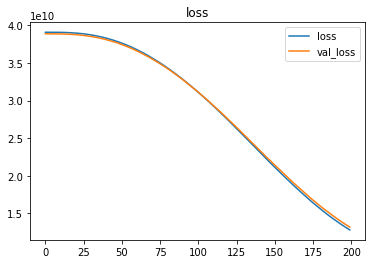

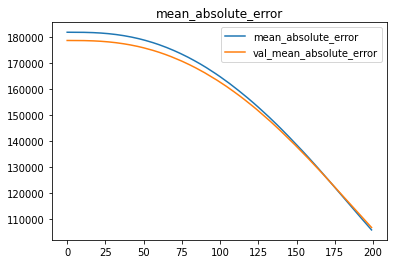

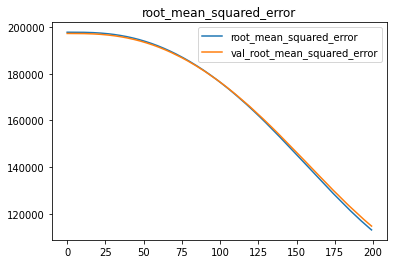

In [18]:
# Fit model and plot it's learning history
history = model_1.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=200, # Give initial model plenty of training time
                        verbose=0)  # this avoids the long output for each epoch

plot_history(history)

### This is showing a slow learning history and and loss reduction. Since this model is showing signs of underfitting (high bias) we can increase the model complexity and see how it changes.  


In [19]:
# Let's rebuild our model using 1 more dense layer
model_2 = Sequential()

model_2.add(Dense(11, input_dim = input_shape, activation = 'relu'))
model_2.add(Dense(8, activation = 'relu'))
model_2.add(Dense(5, activation = 'relu'))
model_2.add(Dense(1, activation = 'linear'))

# Compile model with additional metrics
model_2.compile(loss = 'mse', optimizer = 'adam',
                  metrics = [metrics.MeanAbsoluteError(),
                             metrics.RootMeanSquaredError()])

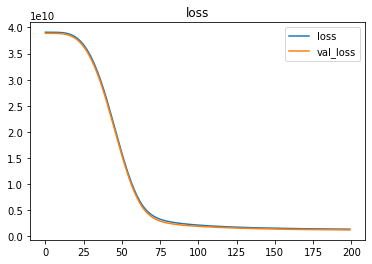

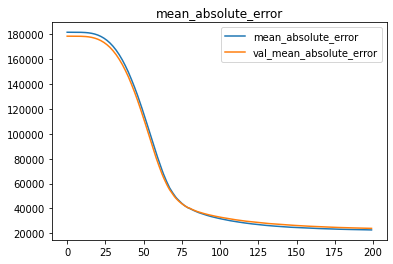

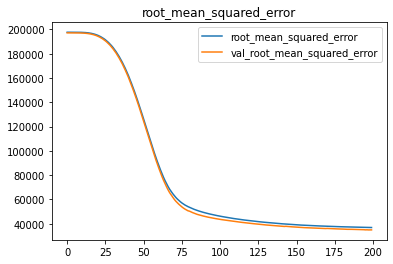

In [20]:
# Fit model 2 and plot it's learning history
  # Keeping the history variable consistent (over-written at each new model)
      # This will keep our plotting consitent without re-defining our plotting function
history = model_2.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=200,
                        verbose=0)

plot_history(history)

### The addition of layers improved our model performance in fewer epochs.
  - Since our model is learning quicker than our epochs, lets use early stopping
  - We are not seeing any signs of overfitting, therefore we will not use additional regularization tequeniques at this time

In [21]:
# Let's rebuild our model using eraly stopping

early_stopping = EarlyStopping(patience = 10, verbose = 1)
model_3 = Sequential()

model_3.add(Dense(11, input_dim = input_shape, activation = 'relu'))
model_3.add(Dense(8, activation = 'relu'))
model_3.add(Dense(6, activation = 'relu'))
model_3.add(Dense(4, activation = 'relu'))
model_3.add(Dense(1, activation = 'linear'))

# Compile model with additional metrics
model_3.compile(loss = 'mse', optimizer = 'adam',
                  metrics = [metrics.MeanAbsoluteError(),
                             metrics.RootMeanSquaredError()])

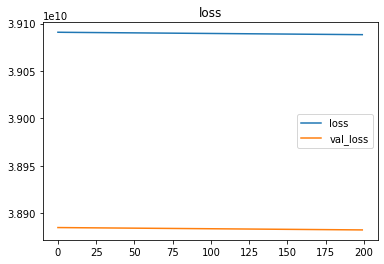

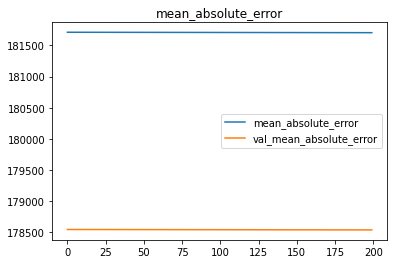

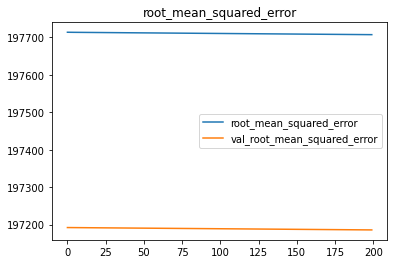

In [22]:
# Fit model 3 and plot it's learning history
history = model_3.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=200,
                        callbacks = early_stopping,
                        verbose=0)

plot_history(history)

### As expected, early stopping reduced our epochs (and therefore decreased our training time)
  - We could make more versions and continue tuning, but for this project we need only 3 models.
  - We would continue to attack our model's bias

In [23]:
# Evaluate the Model
y_pred = model_3.predict(X_test_proc)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

12/12 [==============================] - 0s 2ms/step
final RMSE: 197185.64389524894
final MAE: 178540.9451630697
final R2: -4.550387265983617


### We can see here that our neural network was able to describe about 84% of the variance in the taret (R2 score)
- And our model was off on the home prices by about $22,000

# Now we will run our model_2 on the testing data and submit it to Kaggle

In [24]:
# Create a testing set
test_df = pd.read_csv('/content/house data test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
# Make the data set match our original set (needs to be the same values as training)
Test_df = test_df[['Id', 'OverallQual', 'OverallCond', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GarageCars', 'YearBuilt', 'YrSold', 'LotArea', 'TotRmsAbvGrd']]
Test_df.head()

,Id,OverallQual,OverallCond,CentralAir,1stFlrSF,2ndFlrSF,GarageCars,YearBuilt,YrSold,LotArea,TotRmsAbvGrd
0,1461,5,6,Y,896,0,1.0,1961,2010,11622,5
1,1462,6,6,Y,1329,0,1.0,1958,2010,14267,6
2,1463,5,5,Y,928,701,2.0,1997,2010,13830,6
3,1464,6,6,Y,926,678,2.0,1998,2010,9978,7
4,1465,8,5,Y,1280,0,2.0,1992,2010,5005,5


In [26]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1459 non-null   int64  
 1   OverallQual   1459 non-null   int64  
 2   OverallCond   1459 non-null   int64  
 3   CentralAir    1459 non-null   object 
 4   1stFlrSF      1459 non-null   int64  
 5   2ndFlrSF      1459 non-null   int64  
 6   GarageCars    1458 non-null   float64
 7   YearBuilt     1459 non-null   int64  
 8   YrSold        1459 non-null   int64  
 9   LotArea       1459 non-null   int64  
 10  TotRmsAbvGrd  1459 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 125.5+ KB


In [27]:
# Inspect Data
print(Test_df.duplicated().sum())
print(Test_df.isna().sum())

0
Id              0
OverallQual     0
OverallCond     0
CentralAir      0
1stFlrSF        0
2ndFlrSF        0
GarageCars      1
YearBuilt       0
YrSold          0
LotArea         0
TotRmsAbvGrd    0
dtype: int64


In [28]:
# Fill NA with median of cars
car_med = Test_df['GarageCars'].median()
car_med

2.0

In [29]:
# By imputing one value now, it saves us building a new pre-preocessor
Test_df['GarageCars'].fillna(value = car_med, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
# Inspect dtypes/missing vals
Test_df.info()
print('\n')
print(Test_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1459 non-null   int64  
 1   OverallQual   1459 non-null   int64  
 2   OverallCond   1459 non-null   int64  
 3   CentralAir    1459 non-null   object 
 4   1stFlrSF      1459 non-null   int64  
 5   2ndFlrSF      1459 non-null   int64  
 6   GarageCars    1459 non-null   float64
 7   YearBuilt     1459 non-null   int64  
 8   YrSold        1459 non-null   int64  
 9   LotArea       1459 non-null   int64  
 10  TotRmsAbvGrd  1459 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 125.5+ KB


Id              0
OverallQual     0
OverallCond     0
CentralAir      0
1stFlrSF        0
2ndFlrSF        0
GarageCars      0
YearBuilt       0
YrSold          0
LotArea         0
TotRmsAbvGrd    0
dtype: int64


In [31]:
# Process data (same preprocessor)
test_data_proc = preprocessor.transform(Test_df.drop(columns = 'Id'))
test_data_proc

array([[ 0.        ,  1.        , -0.82692524, ...,  1.64641045,
         0.07910382, -0.96307626],
       [ 0.        ,  1.        , -0.09492594, ...,  1.64641045,
         0.31823609, -0.34744958],
       [ 0.        ,  1.        , -0.82692524, ...,  1.64641045,
         0.27872728, -0.34744958],
       ...,
       [ 0.        ,  1.        , -0.82692524, ..., -1.37212357,
         0.83655191,  0.2681771 ],
       [ 0.        ,  1.        , -0.82692524, ..., -1.37212357,
        -0.02766942, -0.34744958],
       [ 0.        ,  1.        ,  0.63707336, ..., -1.37212357,
        -0.10126249,  1.49943046]])

In [32]:
# Make predictions
test_preds = model_3.predict(test_data_proc)
test_preds

46/46 [==============================] - 0s 1ms/step


array([[6.978272],
       [6.978272],
       [6.978272],
       ...,
       [6.978272],
       [6.978272],
       [6.978272]], dtype=float32)

In [33]:
# Make predictions 1 dimensional to fit into a new prediction DF
test_preds = test_preds.reshape(-1)

In [34]:
# Assign it to a variable
to_submit = pd.DataFrame({'Id': Test_df['Id'], 'SalePrice': test_preds})

In [35]:
# Make sure it looks correct
to_submit.head()

,Id,SalePrice
0,1461,6.978272
1,1462,6.978272
2,1463,6.978272
3,1464,6.978272
4,1465,6.978272


In [36]:
# Kaggle will only take predictions with 1459 values
to_submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 17.2 KB


In [37]:
# Save file in drive to submit to Kaggle
from google.colab import drive
drive.mount('/content/drive')

to_submit.to_csv('/content/drive/MyDrive/KaggleNN.csv', index = False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


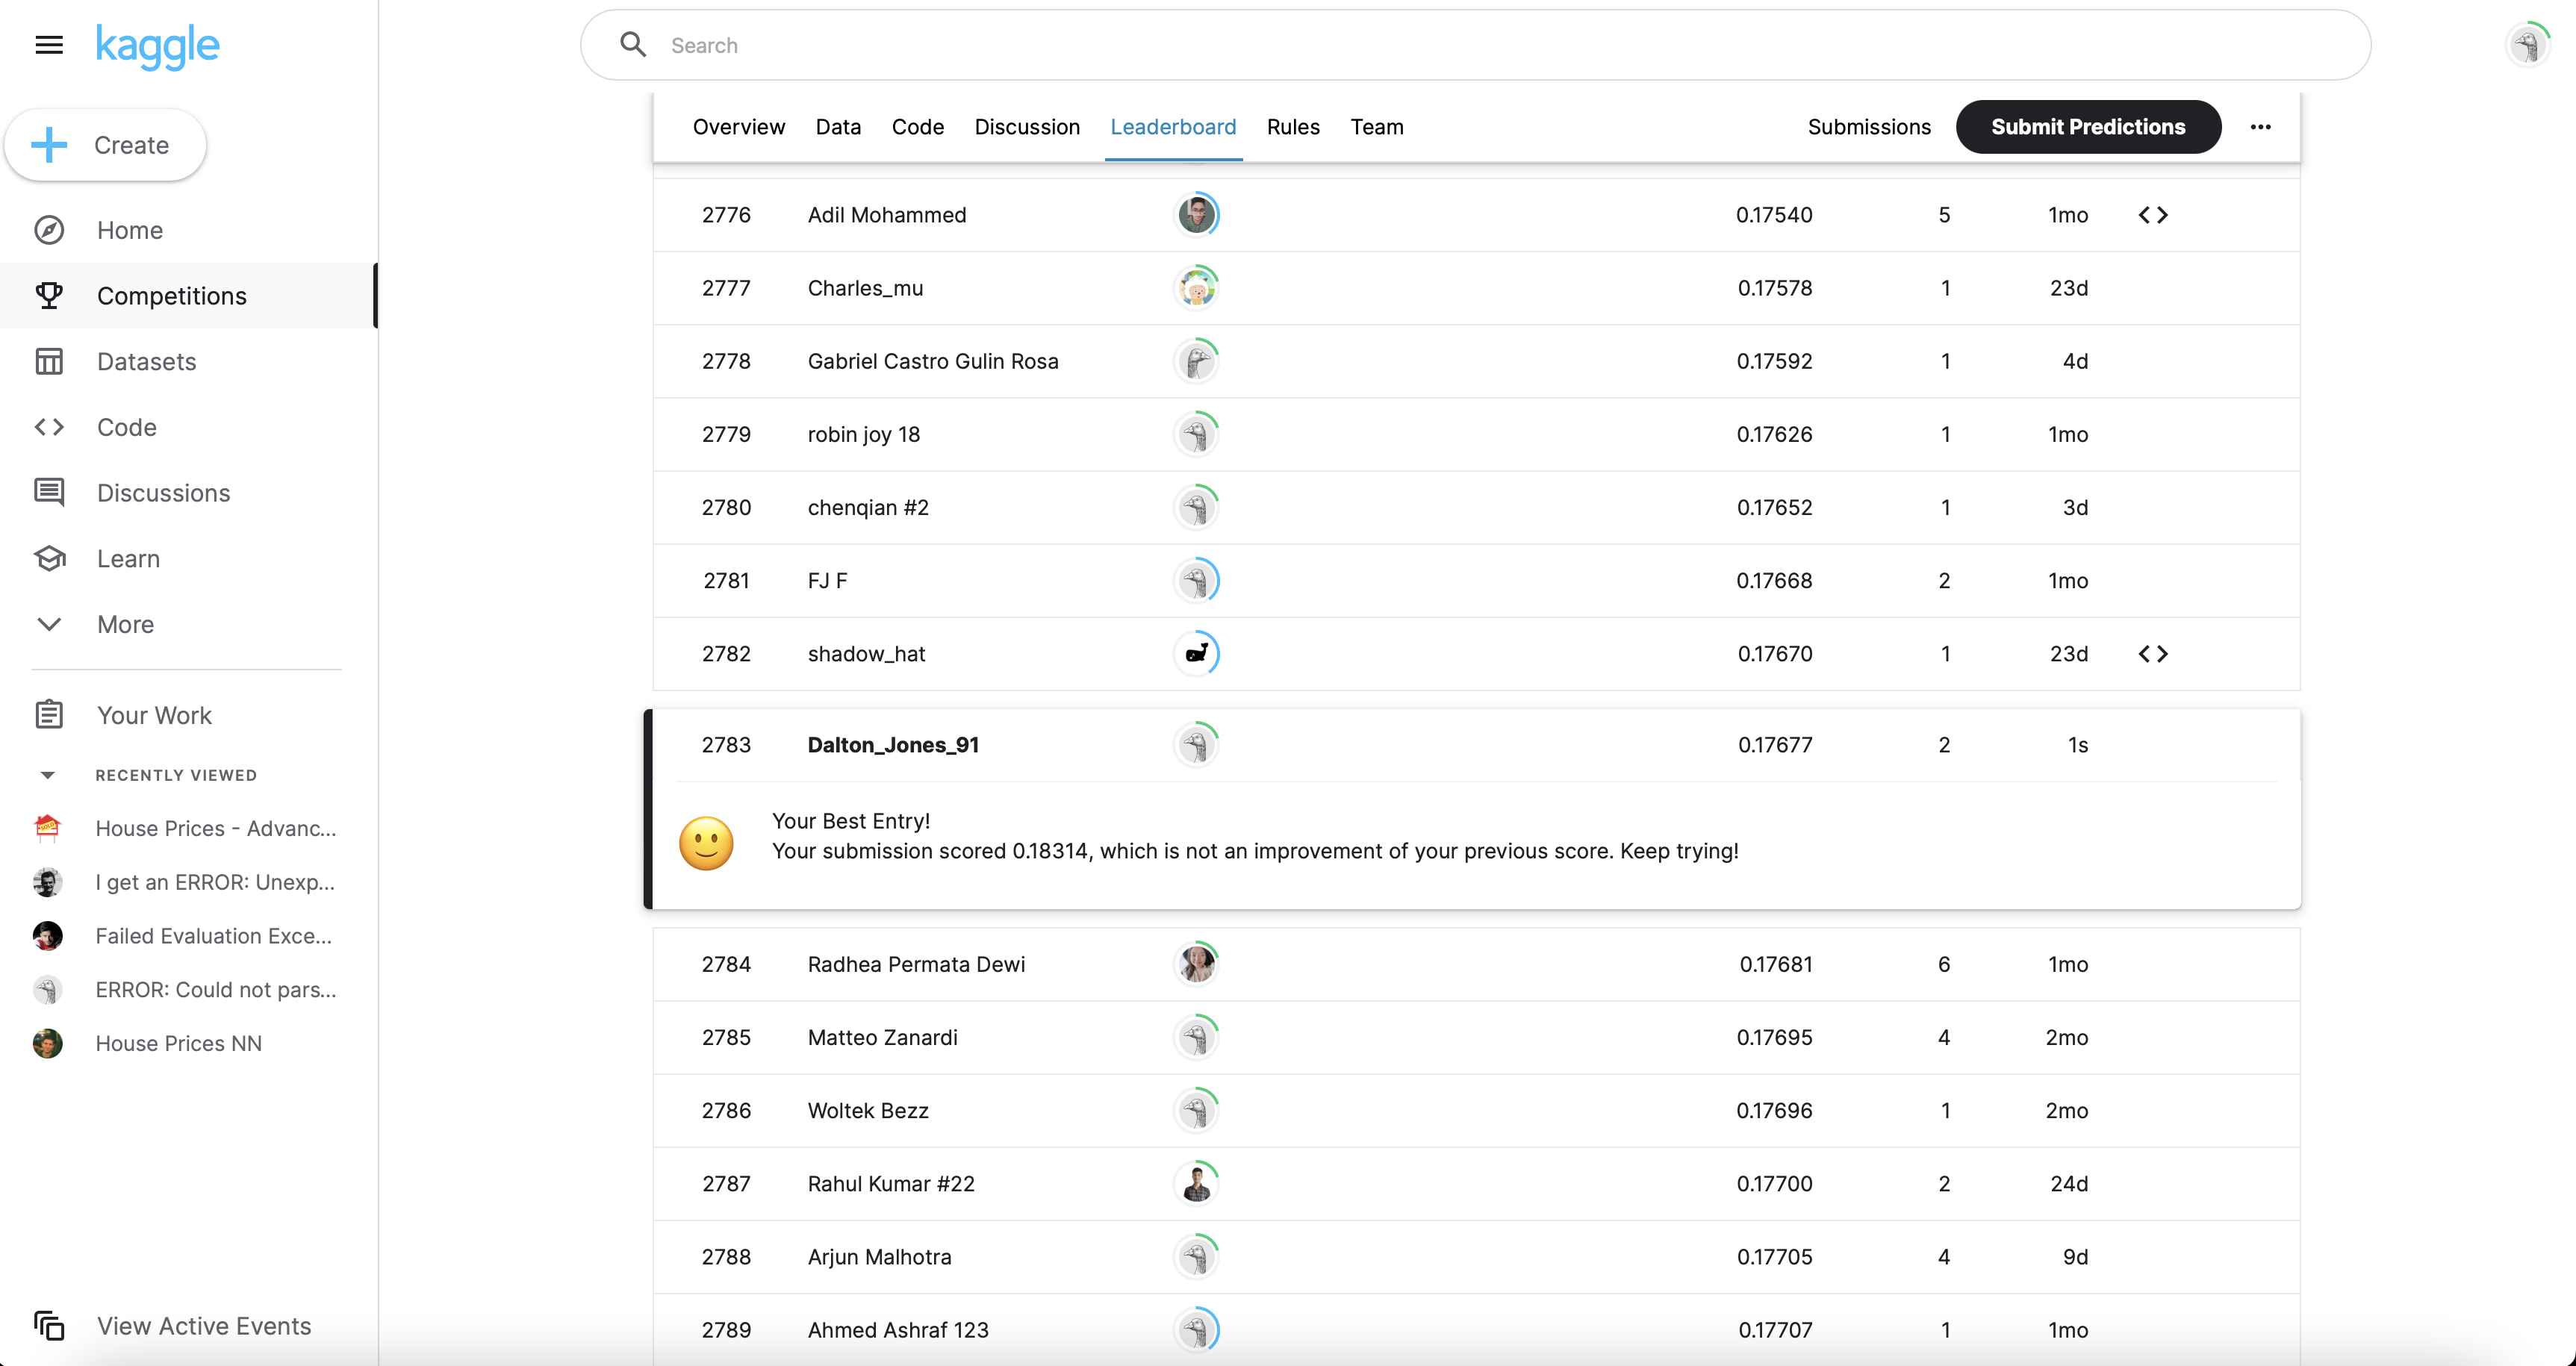